<a href="https://colab.research.google.com/github/DeepakKumarSingh003/Rossmann-Sales-Prediction-/blob/main/Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

#Using Machine Learning to predict sales.
Without proper sales forecasting, many business decisions are based on unreliable estimates or instinct – which leads to many inefficiencies and missed opportunities. with forecating we can answer Questions like.
* How much stock should be ordered? 
* How much revenue can be expected in upcoming Year.? 

**What is sales forecasting?**

A sales forecast is an estimation of future sales. This estimation can be based on past values, economic indicators, seasonality, weather forecasts… etc.

#Import Important Libraries.

In [121]:
#Import numpy with alias np
import numpy as np
#Import pandas with alias pd
import pandas as pd
#Import seaborn with alias sns
import seaborn as sns
#Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')


#Data Import

In [122]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [123]:
#Data set csv Files location. 
File1="/content/drive/MyDrive/Alma better Projects/Supervised ML-Regression/Copy of Rossmann Stores Data.csv"
File2="/content/drive/MyDrive/Alma better Projects/Supervised ML-Regression/Copy of store.csv"

**Importing Data set.**

In [124]:
#Load Rossmann store Data set.
df0=pd.read_csv(File1)
#Load store Data set.
df1=pd.read_csv(File2,index_col="Store")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


#Exploring Data sets.

In [125]:

print("(Rows, Columns)=",df0.shape)
df0.head(1116)



(Rows, Columns)= (1017209, 9)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1111,1112,5,2015-07-31,9626,767,1,1,0,1
1112,1113,5,2015-07-31,7289,720,1,1,0,1
1113,1114,5,2015-07-31,27508,3745,1,1,0,1
1114,1115,5,2015-07-31,8680,538,1,1,0,1


In [126]:
print("(Rows, Columns)=",df1.shape)
df1.head()

(Rows, Columns)= (1115, 9)


,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Store,,,,,,,,,
1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [127]:
df0.info()
print("\n")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1115 entries, 1 to 1115
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StoreType                  1115 non-null   object 
 1   Assortment                 1115 non-null   object 
 2   Compe

In [128]:
df0.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [129]:
df1.describe()

,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [130]:
#Make a function for detail information.
def Detailed_info(DataFrame):
  '''This Function will give detailed information with clearity about the DataFrame it will provide:
      1.Columns name,2.Data type,3.Unique in Data frame,4.Total nulls,5.Not Nulls,6.Percentage of Nulls
  '''
  info = pd.DataFrame(index=DataFrame.columns)
  info['dtype'] = DataFrame.dtypes
  info['Unique'] = DataFrame.nunique()
  info['Num_ofNullValues'] = DataFrame.isnull().sum()
  info['Num_nonNullValues'] = DataFrame.count()
  info['percent_ofNullValues'] = info['Num_ofNullValues']/len(DataFrame) * 100
  return info
Detailed_info(df0)



,dtype,Unique,Num_ofNullValues,Num_nonNullValues,percent_ofNullValues
Store,int64,1115,0,1017209,0.0
DayOfWeek,int64,7,0,1017209,0.0
Date,object,942,0,1017209,0.0
Sales,int64,21734,0,1017209,0.0
Customers,int64,4086,0,1017209,0.0
Open,int64,2,0,1017209,0.0
Promo,int64,2,0,1017209,0.0
StateHoliday,object,5,0,1017209,0.0
SchoolHoliday,int64,2,0,1017209,0.0


In [131]:
Detailed_info(df1)

,dtype,Unique,Num_ofNullValues,Num_nonNullValues,percent_ofNullValues
StoreType,object,4,0,1115,0.000000
Assortment,object,3,0,1115,0.000000
CompetitionDistance,float64,654,3,1112,0.269058
CompetitionOpenSinceMonth,float64,12,354,761,31.748879
CompetitionOpenSinceYear,float64,23,354,761,31.748879
Promo2,int64,2,0,1115,0.000000
Promo2SinceWeek,float64,24,544,571,48.789238
Promo2SinceYear,float64,7,544,571,48.789238
PromoInterval,object,3,544,571,48.789238


#Feature Transformation
* Missing Value Imputation.
* Feature scaling.
* Outlier Detection

**1** **Rossman DataSet**

**Date**

In [132]:
#Convert Date into pandas Date time Object.
df0["Date"]=df0["Date"].apply(lambda x:pd.to_datetime(x))



In [133]:
#Extract Days, week_Number, Month, Year from Date which we can further use in our Exploration.
df0['Week_Number'] = df0['Date'].dt.strftime('%U')

df0['Day'] = df0['Date'].dt.day

df0['Month'] = df0['Date'].dt.month
df0['Year'] = df0['Date'].dt.year

#Drop Date feature as now it is not much useful.
df0.drop(['Date'], axis='columns', inplace=True)



In [134]:
df0.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Week_Number,Day,Month,Year
0,1,5,5263,555,1,1,0,1,30,31,7,2015
1,2,5,6064,625,1,1,0,1,30,31,7,2015
2,3,5,8314,821,1,1,0,1,30,31,7,2015
3,4,5,13995,1498,1,1,0,1,30,31,7,2015
4,5,5,4822,559,1,1,0,1,30,31,7,2015


**StateHoliday**

In [135]:
print(df0["StateHoliday"].unique())


['0' 'a' 'b' 'c' 0]


*Convert string a,b,c which represent different holidays into 1 as it also represents a Holiday.*

In [136]:
df0["StateHoliday"] = df0['StateHoliday'].apply(lambda x: str(x).replace('a',"1") if 'a' in str(x) else x)
df0["StateHoliday"] = df0['StateHoliday'].apply(lambda x: str(x).replace('b',"1") if 'b' in str(x) else x)
df0["StateHoliday"] = df0['StateHoliday'].apply(lambda x: str(x).replace('c',"1") if 'c' in str(x) else x)

df0["StateHoliday"] = df0["StateHoliday"].apply(pd.to_numeric, errors='coerce')

In [137]:

df0["StateHoliday"].value_counts()

0    986159
1     31050
Name: StateHoliday, dtype: int64

**2** **Store Data Set**

In [138]:
print("(Rows, Columns)=",df1.shape)
print(df1.info())
df1.sample(5)



(Rows, Columns)= (1115, 9)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1115 entries, 1 to 1115
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StoreType                  1115 non-null   object 
 1   Assortment                 1115 non-null   object 
 2   CompetitionDistance        1112 non-null   float64
 3   CompetitionOpenSinceMonth  761 non-null    float64
 4   CompetitionOpenSinceYear   761 non-null    float64
 5   Promo2                     1115 non-null   int64  
 6   Promo2SinceWeek            571 non-null    float64
 7   Promo2SinceYear            571 non-null    float64
 8   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(1), object(3)
memory usage: 87.1+ KB
None


,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Store,,,,,,,,,
426,a,a,250.0,NaN,NaN,0,NaN,NaN,NaN
901,a,c,3170.0,4.0,2014.0,0,NaN,NaN,NaN
559,d,a,3910.0,11.0,2006.0,1,5.0,2013.0,"Feb,May,Aug,Nov"
341,a,a,190.0,9.0,2011.0,0,NaN,NaN,NaN
688,a,a,18760.0,8.0,2015.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


**Handling the Missing Value**

* Fill CompetitionDistance with max value.

* Fill CompetitionOpenSinceMonth & CompetitionOpenSinceYear with mode.
* Drope Promo2SinceWeek ,Promo2SinceYear , PromoInterval as  they have huge nulls in them.

In [139]:

df1.drop(['Promo2SinceWeek','Promo2SinceYear','PromoInterval'], axis='columns', inplace=True)
df1['CompetitionDistance'] = df1['CompetitionDistance'].fillna(df1['CompetitionDistance'].max())
df1['CompetitionOpenSinceMonth'] = df1['CompetitionOpenSinceMonth'].fillna(df1['CompetitionOpenSinceMonth'].mode().iloc[0])
df1['CompetitionOpenSinceYear'] = df1['CompetitionOpenSinceYear'].fillna(df1['CompetitionOpenSinceYear'].mode().iloc[0])

In [140]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1115 entries, 1 to 1115
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StoreType                  1115 non-null   object 
 1   Assortment                 1115 non-null   object 
 2   CompetitionDistance        1115 non-null   float64
 3   CompetitionOpenSinceMonth  1115 non-null   float64
 4   CompetitionOpenSinceYear   1115 non-null   float64
 5   Promo2                     1115 non-null   int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 61.0+ KB


In [141]:
df1.describe()

,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
count,1115.000000,1115.000000,1115.000000,1115.000000
mean,5594.466368,7.788341,2010.043946,0.512108
std,8479.266802,2.779130,5.500844,0.500078
min,20.000000,1.000000,1900.000000,0.000000
25%,720.000000,6.000000,2008.000000,0.000000
50%,2330.000000,9.000000,2012.000000,1.000000
75%,6905.000000,9.000000,2013.000000,1.000000
max,75860.000000,12.000000,2015.000000,1.000000


**Handling outliers**

Start with our target variable as it is the most important variable.

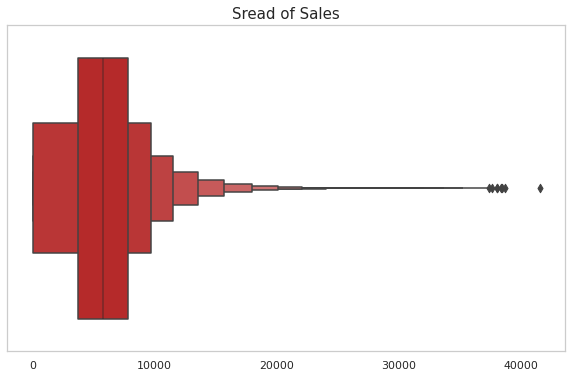

In [142]:
sns.set_theme(rc={'figure.figsize': (10,6)},style='whitegrid')
sns.boxenplot(x=df0['Sales'],color='#CC1313')
plt.grid(False)
plt.xlabel('')
plt.title('Sread of Sales',size=15)
ax = plt.gca()
# for spine in ax.spines.values():
#   spine.set_visible(False)

**Observation:-**We can clearly visualize that Sales above 25000 is very less in percentage. lets explore more to validate our assumption.

In [144]:
#Rows with Sales above 25k
df_mask=df0['Sales']>=25000
filtered_df = df0[df_mask]
filtered_df


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Week_Number,Day,Month,Year
261,262,5,25774,3669,1,1,0,1,30,31,7,2015
755,756,5,25280,2901,1,1,0,1,30,31,7,2015
1113,1114,5,27508,3745,1,1,0,1,30,31,7,2015
3343,1114,3,25840,3545,1,1,0,1,30,29,7,2015
4458,1114,2,25518,3456,1,1,0,1,30,28,7,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
1009106,817,2,28050,3862,1,1,0,0,01,8,1,2013
1010192,788,1,26008,2270,1,1,0,0,01,7,1,2013
1010221,817,1,32263,4065,1,1,0,0,01,7,1,2013
1010516,1112,1,25165,1661,1,1,0,0,01,7,1,2013


In [145]:
# Percentage of Outliers 
zero_sales = df0.loc[df0['Sales']==0]

sales_greater_than_25k = df0.loc[df0['Sales'] > 25000]

print('Length of the dataset:', len(df0))
print('Percentage of Zeros in dataset: %.3f%%' %((len(zero_sales)/len(df0))*100))
print('Percentage of sales greater than 25k in dataset: %.3f%% ' %((len(sales_greater_than_25k)/len(df0))*100))

Length of the dataset: 1017209
Percentage of Zeros in dataset: 16.995%
Percentage of sales greater than 25k in dataset: 0.075% 


**Obervation:-**
We can drop the sales datapoints which are greater than 25k as they are very less percentage of the dataset and are probably outliers.


**Drop Outliers**


In [146]:
#Drop sales value above 25000
df0.drop(df0.loc[df0['Sales'] > 25000].index,inplace=True)

**Customers**

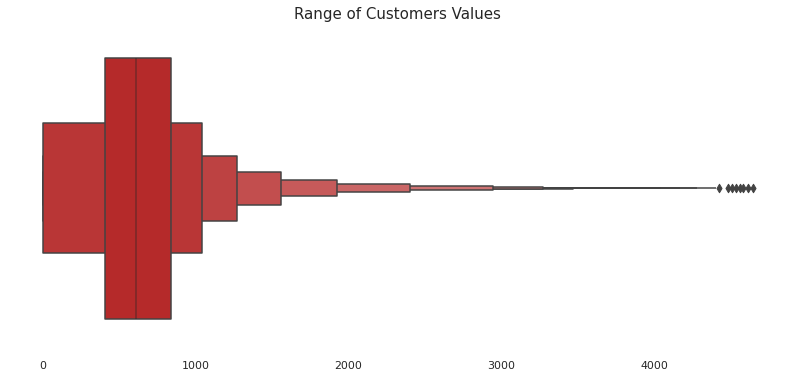

In [147]:
sns.set_theme(rc={'figure.figsize': (14,6)},style='whitegrid')
sns.boxenplot(x=df0['Customers'],color='#CC1313')
plt.grid(False)
plt.xlabel('')
plt.title('Range of Customers Values',size=15)
ax = plt.gca()
for spine in ax.spines.values():
  spine.set_visible(False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


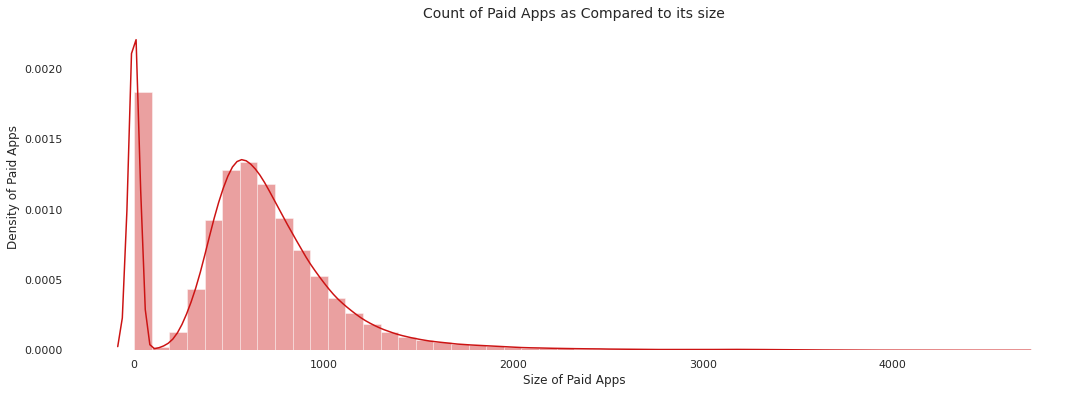

In [148]:
sns.set_theme(palette='autumn',rc={'figure.figsize': (18,6)},style='whitegrid')
sns.distplot(x=df0['Customers'],color='#CC1313')
plt.title('Count of Paid Apps as Compared to its size',size=14)
plt.ylabel('Density of Paid Apps',size=12)
plt.xlabel('Size of Paid Apps',size=12)
plt.grid(False)
for spine in plt.gca().spines.values():
  spine.set_visible(False)
plt.show()  

In [149]:
#Customers above 2500
df_mask=df0['Customers']>=2500
filtered_df = df0[df_mask]
filtered_df

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Week_Number,Day,Month,Year
250,251,5,22205,2508,1,1,0,1,30,31,7,2015
258,259,5,14096,2628,1,1,0,1,30,31,7,2015
334,335,5,17867,2592,1,1,0,1,30,31,7,2015
561,562,5,20303,3255,1,1,0,1,30,31,7,2015
585,586,5,17879,2501,1,1,0,1,30,31,7,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
1015241,262,3,16964,3113,1,0,0,1,00,2,1,2013
1015541,562,3,15472,2744,1,0,0,1,00,2,1,2013
1015712,733,3,12477,3121,1,0,0,1,00,2,1,2013
1016093,1114,3,20642,3401,1,0,0,1,00,2,1,2013


In [150]:
# Percentage of Outliers in customers section.
zero_Customers = df0.loc[df0['Customers']==0]

Customers_More_than_2500 = df0.loc[df0['Customers'] > 2500]

print('Length of the dataset:', len(df0))
print('Percentage of Zeros in dataset: %.3f%%' %((len(zero_sales)/len(df0))*100))
print('Percentage of Customers more than 2500 in dataset: %.3f%% ' %((len(sales_greater_than_25k)/len(df0))*100))

Length of the dataset: 1016451
Percentage of Zeros in dataset: 17.007%
Percentage of Customers more than 2500 in dataset: 0.075% 


**Obervation:-**We can drop the Customers datapoints which are greater than 2500 as they are very less percentage of the dataset and are probably outliers.

**Drop Outliers**

In [151]:
#Drop Cutomers value above 2500
df0.drop(df0.loc[df0['Customers'] > 2500].index,inplace=True)

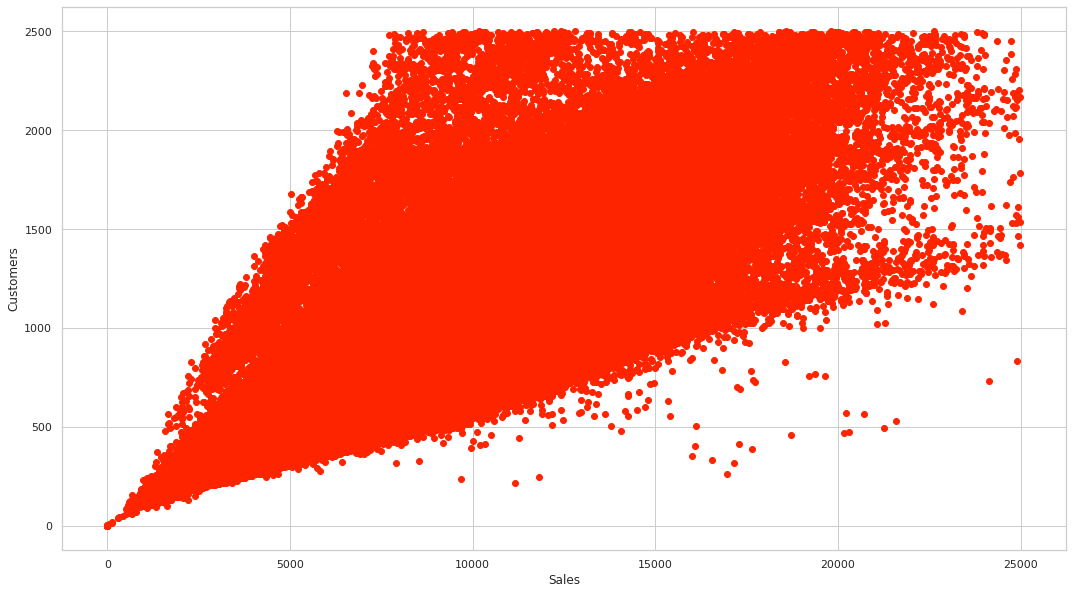

In [152]:
# Scatter plot
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(df0['Sales'], df0['Customers'])
 
# x-axis label
ax.set_xlabel('Sales')
 
# y-axis label
ax.set_ylabel('Customers')
plt.show()

In [153]:
df1.head()
df1.shape

(1115, 6)

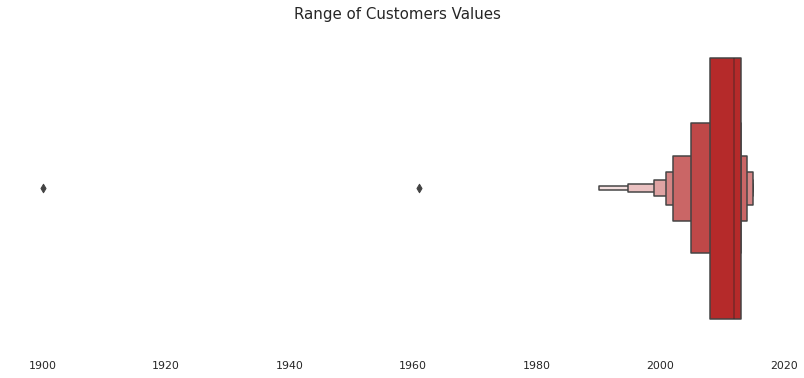

In [154]:
sns.set_theme(rc={'figure.figsize': (14,6)},style='whitegrid')
sns.boxenplot(x=df1['CompetitionOpenSinceYear'],color='#CC1313')
plt.grid(False)
plt.xlabel('')
plt.title('Range of Customers Values',size=15)
ax = plt.gca()
for spine in ax.spines.values():
  spine.set_visible(False)

In [155]:
#Drop Cutomers value above 2500
df1.drop(df1.loc[df1['CompetitionOpenSinceYear'] < 1980].index,inplace=True)

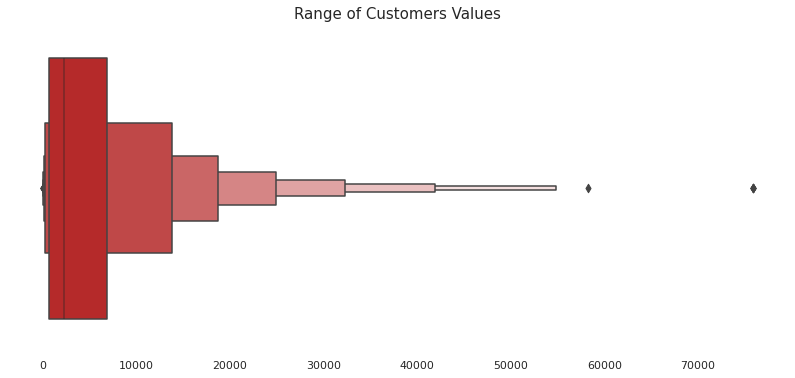

In [156]:
sns.set_theme(rc={'figure.figsize': (14,6)},style='whitegrid')
sns.boxenplot(x=df1['CompetitionDistance'],color='#CC1313')
plt.grid(False)
plt.xlabel('')
plt.title('Range of Customers Values',size=15)
ax = plt.gca()
for spine in ax.spines.values():
  spine.set_visible(False)

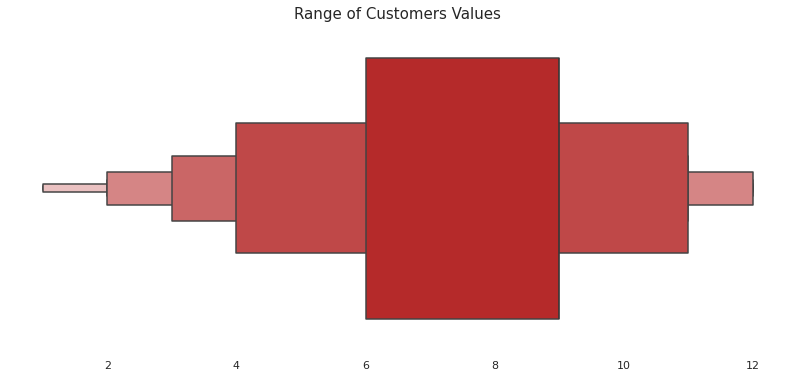

In [164]:
sns.set_theme(rc={'figure.figsize': (14,6)},style='whitegrid')
sns.boxenplot(x=df1['CompetitionOpenSinceMonth'],color='#CC1313')
plt.grid(False)
plt.xlabel('')
plt.title('Range of Customers Values',size=15)
ax = plt.gca()
for spine in ax.spines.values():
  spine.set_visible(False)

#**EDA With Data Visualization**

#Feature Engineering after Merging Data sets on store

In [158]:
df= df0.merge(df1 , on='Store' , how='left')
print(df.shape)

(1009476, 18)


In [165]:
df

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Week_Number,Day,Month,Year,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
0,1,5,5263,555,1,1,0,1,30,31,7,2015,c,a,1270.0,9.0,2008.0,0.0
1,2,5,6064,625,1,1,0,1,30,31,7,2015,a,a,570.0,11.0,2007.0,1.0
2,3,5,8314,821,1,1,0,1,30,31,7,2015,a,a,14130.0,12.0,2006.0,1.0
3,4,5,13995,1498,1,1,0,1,30,31,7,2015,c,c,620.0,9.0,2009.0,0.0
4,5,5,4822,559,1,1,0,1,30,31,7,2015,a,a,29910.0,4.0,2015.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009471,1111,2,0,0,0,0,1,1,00,1,1,2013,a,a,1900.0,6.0,2014.0,1.0
1009472,1112,2,0,0,0,0,1,1,00,1,1,2013,c,c,1880.0,4.0,2006.0,0.0
1009473,1113,2,0,0,0,0,1,1,00,1,1,2013,a,c,9260.0,9.0,2013.0,0.0
1009474,1114,2,0,0,0,0,1,1,00,1,1,2013,a,c,870.0,9.0,2013.0,0.0


In [159]:
df.Sales.value_counts()

0        172871
5674        215
5558        197
5483        196
6049        195
          ...  
22442         1
24785         1
16758         1
1027          1
20355         1
Name: Sales, Length: 19609, dtype: int64

**Distribution of Sales**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


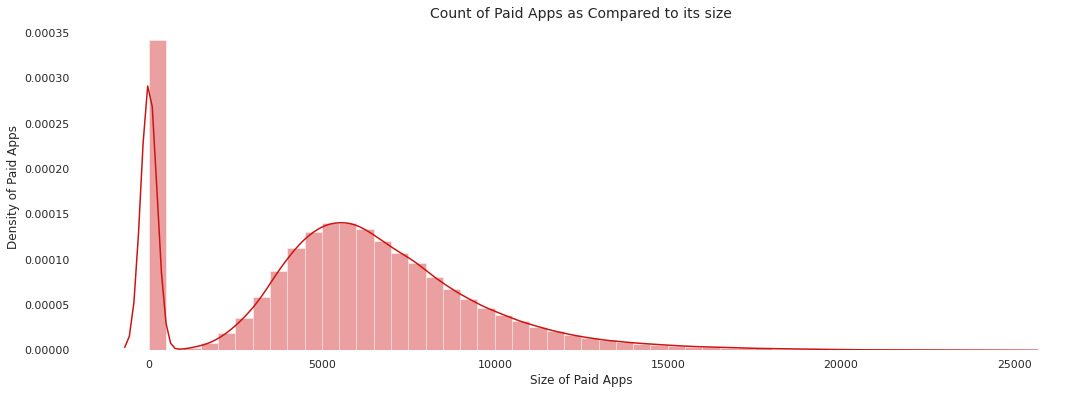

In [168]:
# paid_apps = playstore_df[playdf.Type == 'Paid']
sns.set_theme(palette='autumn',rc={'figure.figsize': (18,6)},style='whitegrid')
sns.distplot(x=df0['Sales'],color='#CC1313')
plt.title('Count of Paid Apps as Compared to its size',size=14)
plt.ylabel('Density of Paid Apps',size=12)
plt.xlabel('Size of Paid Apps',size=12)
plt.grid(False)
for spine in plt.gca().spines.values():
  spine.set_visible(False)
plt.show()  

**Observation:-**Lots of zero sales is disturbing our Target Variable.
When stores are closed the sales value is zero hence we have deal with the zero sales.

**Some exceptional cases**
* Looking for a scenerio where the Stores are open and yet there is no sales on that .
* Looking for a scenerio where the Stores are close and yet there sales on that day

In [166]:
No_Sales=df.loc[(df['Sales']==0) & (df['Open'] == 1) & (df['StateHoliday'] == 0) 
                               & (df['SchoolHoliday'] == 0)]
print(No_Sales.shape)
No_Sales.head()

(42, 18)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Week_Number,Day,Month,Year,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
141147,674,4,0,0,1,0,0,0,12,26,3,2015,a,a,2640.0,12.0,2005.0,1.0
195421,699,4,0,0,1,1,0,0,05,5,2,2015,a,a,180.0,9.0,2013.0,1.0
319441,708,3,0,0,1,1,0,0,39,1,10,2014,c,c,11470.0,10.0,2009.0,1.0
327496,357,1,0,0,1,0,0,0,38,22,9,2014,a,a,2060.0,10.0,2008.0,0.0
337590,227,4,0,0,1,0,0,0,36,11,9,2014,a,a,2370.0,9.0,2013.0,0.0


In [167]:
Sales_Closed=df.loc[(df['Sales']<0) & (df['Open'] == 0)]
print(Sales_Closed.shape)
# No_Sales.head()

(0, 18)


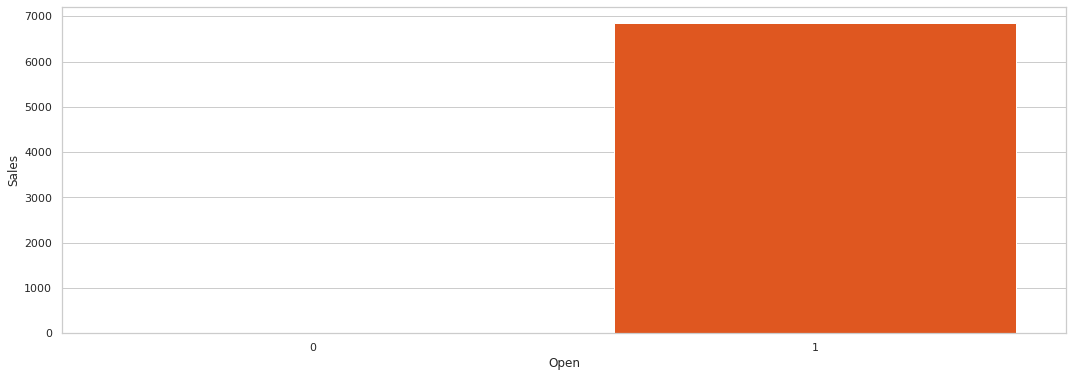

In [173]:
sns.barplot(x = 'Open',
            y = 'Sales',
            data = df0)
 
# Show the plot
plt.show()

**conclusion:-**
* When stores are closed there is no relation hence remove rows when stores are closed.
*  where there is no record of sales even without any holidays. We can remove these data points too as they are an exceptional case

In [174]:
df=df[df.Open != 0]
df.drop(df.loc[(df['Sales']==0) & (df['Open'] == 1)& (df['StateHoliday'] == 0) & (df['SchoolHoliday'] == 0)].index,inplace=True)
print(df.shape)

(836617, 18)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


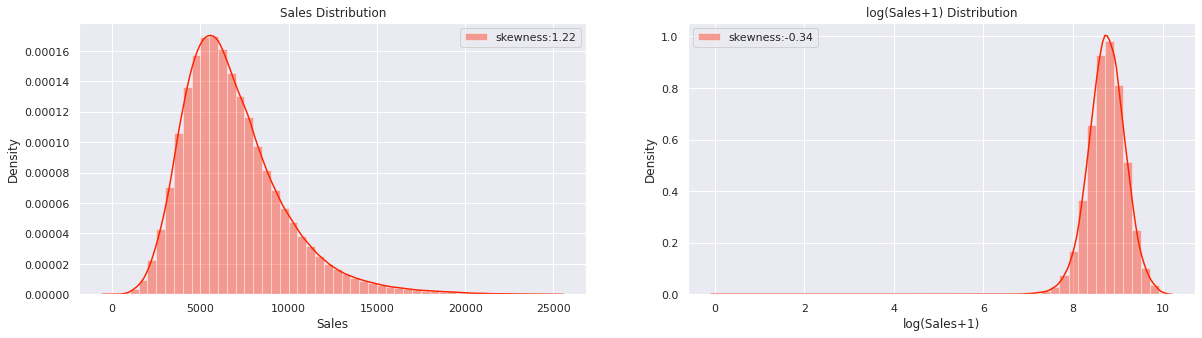

In [216]:
#Compare Distribution of Sales withot and with log tranformation after cleaning it.
import warnings
warnings.filterwarnings("ignore")


fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
g1 = sns.distplot(df['Sales'],hist = True,label='skewness:{:.2f}'.format(df['Sales'].skew()),ax = ax1)
g1.legend()
g1.set(xlabel = 'Sales', ylabel = 'Density', title = 'Sales Distribution')
g2 = sns.distplot(np.log1p(df['Sales']),hist = True,label='skewness:{:.2f}'.format(np.log1p(df['Sales']).skew()),ax=ax2)
g2.legend()
g2.set(xlabel = 'log(Sales+1)',ylabel = 'Density', title = 'log(Sales+1) Distribution')
plt.show()

**Conclusion:-**
* Great! Oue Target variable is ready to train and test.

**Store**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


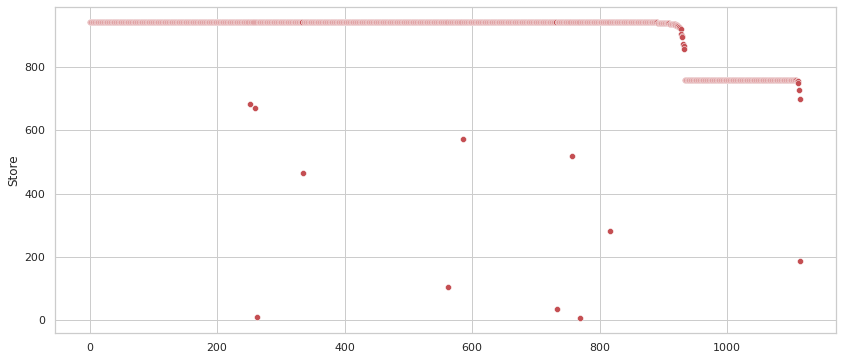

In [162]:
sns.scatterplot(df["Store"].unique(),df["Store"].value_counts(),color='r')
plt.show()

**Days of Week**

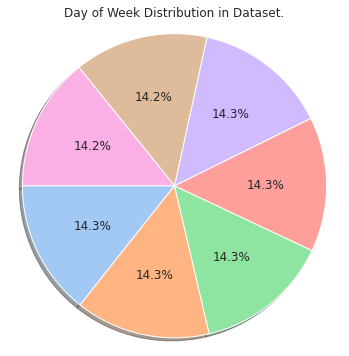

In [171]:
#Affect on Sales due to SchoolHolidays 

sizes = df.DayOfWeek.value_counts()
colors = sns.color_palette('pastel')
explode = (0.1, 0.0)
plt.pie(sizes,colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Day of Week Distribution in Dataset.")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

**Affect of Days Of Week over Sales** 

In [179]:
Sales_on_Dayofweek=df.groupby(['DayOfWeek'])[['Sales']].sum()
Sales_on_Dayofweek

,Sales
DayOfWeek,
1,1100150696
2,999210959
3,936205849
4,892147829
5,959657530
6,829141988
7,17245825


In [180]:
df.groupby(['DayOfWeek'])[['Sales']].count()

,Sales
DayOfWeek,
1,136054
2,142778
3,140846
4,133538
5,137455
6,143045
7,2901


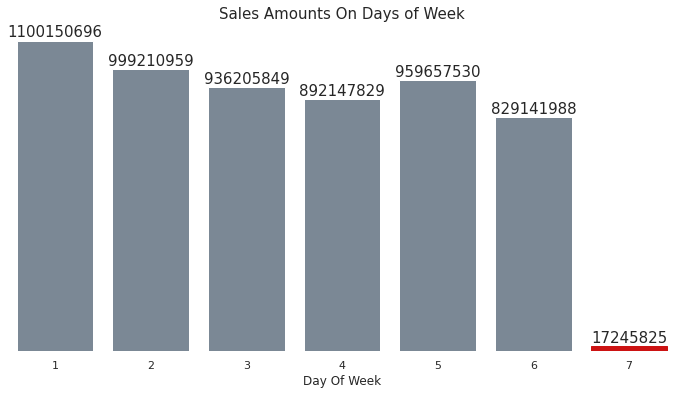

In [182]:
#Groupby Content Rating count the apps sort in decending order.
Sales_df = df.groupby('DayOfWeek').agg({"Sales": "sum"}).reset_index().sort_values('Sales',ascending=True)
#Select sns background,size and color.
sns.set_theme(style="whitegrid",rc={'figure.figsize':(12,6)},palette='autumn')
#plot count of content ratings on bar chart.
bars = sns.barplot(x=Sales_df['DayOfWeek'],y=Sales_df.Sales,color='lightslategrey')
#set first bar to color.
bars.patches[6].set_color('#CC1313')
#Title
plt.title('Sales Amounts On Days of Week',size=15)
#Hide Grid 
plt.grid(False)
ax=plt.gca()
#X labels
plt.xlabel('Day Of Week')
plt.ylabel('')
#Hide y axis tick labels
ax.axes.yaxis.set_ticklabels([])
for spine in ax.spines.values():
  spine.set_visible(False)
#Show the counts on top of bar after iterating on each bar.
for bar in bars.patches:
  bars.annotate(format(bar.get_height(),'.0f'),(bar.get_x()+bar.get_width()/2,
                    bar.get_height()+3), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

In [ ]:
sns.factorplot(x='Sales', y='Customers', hue='Promo', data=df, kind='')

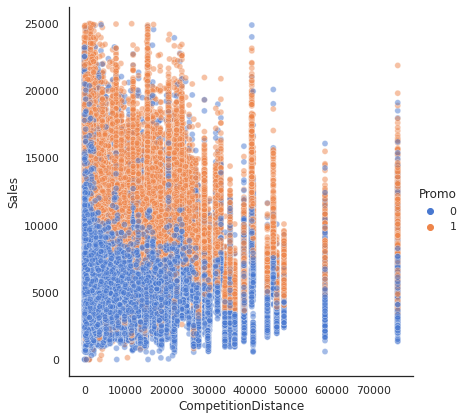

In [185]:
sns.set_theme(style="white")

# # Load the example mpg dataset
# mpg = sns.load_dataset("")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="CompetitionDistance", y="Sales", hue="Promo",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)

In [210]:
Sales_df = df.groupby(["Promo","Assortment"]).agg({"Sales": "sum"}).reset_index().sort_values('Sales',ascending=True)
Sales_df

,Promo,Assortment,Sales
4,1,b,13836611
1,0,b,23868993
2,0,c,1331608449
0,0,a,1343179874
5,1,c,1461786744
3,1,a,1548171599


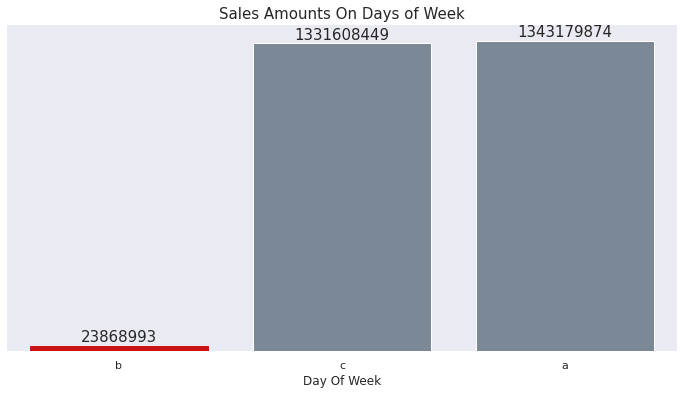

In [215]:
assortment_df = df.groupby(['Assortment']).agg({"Sales": "sum"}).reset_index().sort_values('Sales',ascending=True)
#Select sns background,size and color.
sns.set_theme(rc={'figure.figsize':(12,6)},palette='autumn')
#plot count of content ratings on bar chart.
bars = sns.barplot(x=assortment_df['Assortment'],y=Sales_df.Sales,color='lightslategrey')
#set first bar to color.
bars.patches[0].set_color('#CC1313')
#Title
plt.title('Sales Amounts On Days of Week',size=15)
#Hide Grid 
plt.grid(False)
ax=plt.gca()
#X labels
plt.xlabel('Day Of Week')
plt.ylabel('')
#Hide y axis tick labels
ax.axes.yaxis.set_ticklabels([])
for spine in ax.spines.values():
  spine.set_visible(False)
#Show the counts on top of bar after iterating on each bar.
for bar in bars.patches:
  bars.annotate(format(bar.get_height(),'.0f'),(bar.get_x()+bar.get_width()/2,
                    bar.get_height()+3), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

In [ ]:
sns.factorplot("StoreType", "Sales", col="Promo", data=df, kind="bar")

In [ ]:
sns.barplot(x = 'DayOfWeek',y = 'Sales', data = df0)
 
# Show the plot
plt.show()

In [ ]:
df0.DayOfWeek.value_counts()

In [ ]:
sns.barplot(x = 'DayOfWeek',y = 'Sales',hue="StateHoliday", data = df)
 
# Show the plot
plt.show()

In [ ]:
sns.barplot(x = 'DayOfWeek',y = 'Sales',hue="SchoolHoliday", data = df)
 
# Show the plot
plt.show()

In [ ]:
sns.stripplot(x="DayOfWeek", y="Sales", data=df0) 

In [ ]:
Sales_on_Dayofweek=df.groupby(['DayOfWeek'])[['Sales']].sum()
Sales_on_Dayofweek

In [ ]:
sns.barplot(x = 'Promo',
            y = 'Sales',
            data = df0)
 
# Show the plot
plt.show()

In [ ]:
plt.subplots(figsize=(15,8));
sns.scatterplot(df0["Sales"],df0["Customers"],data=df0)
plt.title('Sales vs Customer',fontsize=18)
plt.grid(False)
plt.xlabel("Sales",fontsize=12)
plt.ylabel("Customer",fontsize=12)
plt.show()


In [ ]:
df0.Store.unique()

In [ ]:
df0.corr()

In [ ]:
sns.barplot(x = 'StateHoliday',
            y = 'Sales',
            data = df0)
 
# Show the plot
plt.show()

In [ ]:
sns.barplot(x = 'SchoolHoliday',
            y = 'Sales',
            data = df0)
 
# Show the plot
plt.show()

In [ ]:
df0['Week_Number'].sort_values()

In [ ]:
plt.rcParams['figure.figsize']=(20,5)
sns.barplot(x = df0["Week_Number"].sort_values(),
            y = "Sales",
            
            data = df0)
 

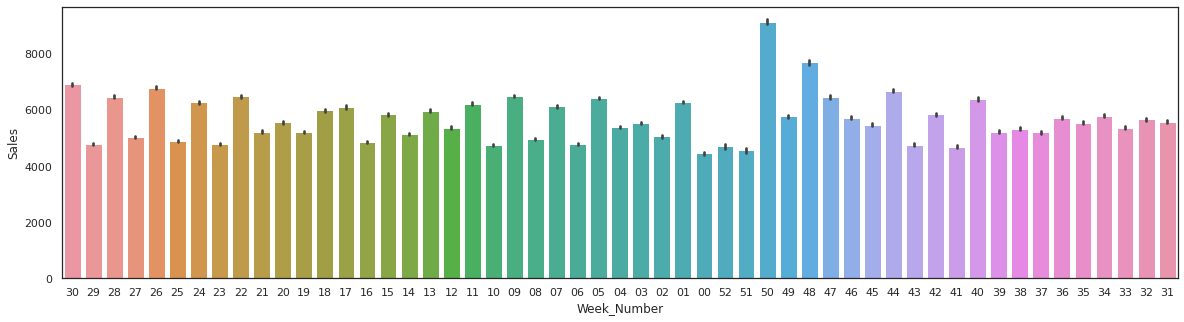

In [186]:
plt.rcParams['figure.figsize']=(20,5)
sns.barplot(x = "Week_Number",
            y = 'Sales',
            
            data = df)
 
# Show the plot
plt.show()

In [ ]:

df

**Create Day Month Year separate columns**

**One Hot Encoding for the storeType and Assortment**

In [ ]:
df=pd.get_dummies(df, columns = ['StoreType',	'Assortment','PromoInterval'])

In [ ]:
df


#Model Built

In [ ]:
from sklearn.model_selection import train_test_split

X = ['Customers','CompetitionDistance','Promo','Promo2','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','StateHoliday','StoreType','Assortment',
    'DayOfWeek','Week','Day','Month','Year']

X_data = df[X]
Y_data = np.log(df['Sales'])
X_train,X_test,y_train,y_test = train_test_split(X_data,Y_data,test_size=0.2,random_state=0)

In [ ]:
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import make_scorer,mean_squared_error 


def plot_importance(model):
    k = list(zip(X,model.feature_importances_))
    k.sort(key=lambda tup: tup[1])
    
    labels, vals = zip(*k)
    
    plt.barh(np.arange(len(X)),vals,align = 'center')
    plt.yticks(np.arange(len(X)),labels)